## Add Weather information to NYC Bike Share Data

In [1]:
import pandas as pd
from pandas import to_datetime
import seaborn as sns
import matplotlib.pyplot as plt

import requests

In [2]:
df = pd.read_csv('202009-citibike-tripdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488225 entries, 0 to 2488224
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 284.8+ MB


### Prepare data 
Convert starttime from object to datetime.  
Create columns with  hour of day, day of month and weekend flag

In [4]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category')
df['weekday']=df['starttime'].dt.weekday.astype('category')
df['weekend'] = [ d >=5 for d in df['weekday']]

### Rides by hour
View ride distribution over the day

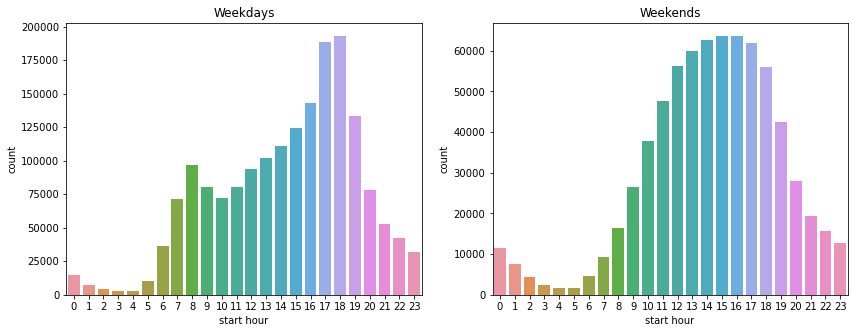

In [5]:
fig, ax =plt.subplots(1,2, figsize=(14,5))
sns.countplot(data=df[~df['weekend']],x="start hour" , ax=ax[0]).set_title("Weekdays")
sns.countplot(data=df[df['weekend']],x="start hour" , ax=ax[1]).set_title("Weekends") ;

### Rides by Day
Show rides by day of month.  
Color bars to indicate weekend using hue

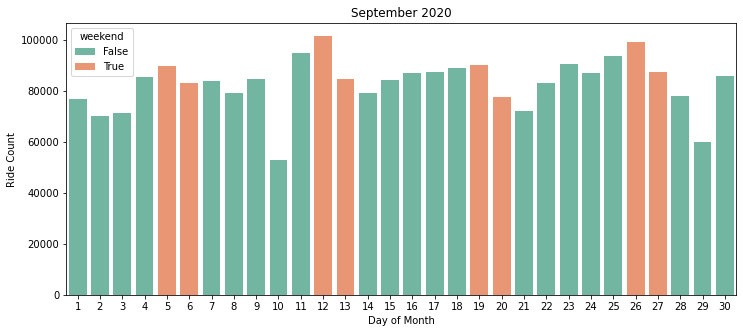

In [6]:
plt.figure(figsize=(12,5))
sns.set_palette("Set2")
ax=sns.countplot(data=df,x="start day" , hue='weekend' , dodge=False ) 
ax.set(xlabel="Day of Month", ylabel = "Ride Count", title='September 2020') ;

## Weather

Get weather information from [visualcrossing](https://www.visualcrossing.com/weather/weather-data-services#/login) and sign up for a free account. Then genererate a URL: 
1. When prompted for "Enter a location" use 10001
2. Click on **Weather API**
3. Click Radio Button for Date or Date Range
4. Select Dates September 1, 2020 to September 30, 2020
5. Click Radio Button for **Obs**
6. Click button **Copy Query**
7. Paste URL between quotes below  

In [7]:
### url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/10001/2020-9-1/2020-9-30?unitGroup=us&key=_YOUR_API_KEY__GOES_HERE&include=obs'

#### Alternative - Read API Key From a File
So that you don't have to store your API Key in a Jupyter Notebook where others may see it, create a file in your bikeshare directory with the name `visualcrossing.key`, read it into a variable `key`, and then create the `url` variable.

In [8]:
key=pd.read_csv('visualcrossing.key',header=None)[0][0]

In [9]:
url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/10001/2020-9-1/2020-9-30?unitGroup=us'+\
     '&key=' + key + '&include=obs'

Get result and check status code; it should be 200

In [10]:
response=requests.get(url)
response.status_code

200

In [11]:
response.json().keys()

dict_keys(['queryCost', 'latitude', 'longitude', 'resolvedAddress', 'address', 'timezone', 'tzoffset', 'days', 'stations'])

Look at first day's data

In [12]:
response.json()['days'][0]

{'datetime': '2020-09-01',
 'datetimeEpoch': 1598932800,
 'tempmax': 77.4,
 'tempmin': 66.9,
 'temp': 71.7,
 'feelslikemax': 77.4,
 'feelslikemin': 66.9,
 'feelslike': 71.7,
 'dew': 64.4,
 'humidity': 78.52,
 'precip': 0.2,
 'precipprob': None,
 'precipcover': 29.17,
 'preciptype': None,
 'snow': 0.0,
 'snowdepth': 0.0,
 'windgust': 42.5,
 'windspeed': 9.7,
 'winddir': 87.6,
 'pressure': 1019.5,
 'cloudcover': 54.1,
 'visibility': 8.9,
 'solarradiation': None,
 'solarenergy': None,
 'sunrise': '06:23:24',
 'sunriseEpoch': 1598955804,
 'sunset': '19:27:30',
 'sunsetEpoch': 1599002850,
 'moonphase': 0.5,
 'conditions': 'Rain, Partially cloudy',
 'icon': 'rain',
 'stations': ['72505394728',
  '72055399999',
  'KLGA',
  'KJRB',
  'KNYC',
  '72503014732'],
 'source': 'obs',
 'hours': None}

Convert dictionary to a DataFrame

In [13]:
dfweather=pd.DataFrame(response.json()['days'])
dfweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        30 non-null     object 
 1   datetimeEpoch   30 non-null     int64  
 2   tempmax         30 non-null     float64
 3   tempmin         30 non-null     float64
 4   temp            30 non-null     float64
 5   feelslikemax    30 non-null     float64
 6   feelslikemin    30 non-null     float64
 7   feelslike       30 non-null     float64
 8   dew             30 non-null     float64
 9   humidity        30 non-null     float64
 10  precip          30 non-null     float64
 11  precipprob      0 non-null      object 
 12  precipcover     30 non-null     float64
 13  preciptype      0 non-null      object 
 14  snow            30 non-null     float64
 15  snowdepth       30 non-null     float64
 16  windgust        23 non-null     float64
 17  windspeed       30 non-null     float


Look at the most interestng columns

In [14]:
dfweather[['datetime','tempmax','tempmin','temp','humidity','precip','snow','windgust','windspeed','visibility']].head(10)

,datetime,tempmax,tempmin,temp,humidity,precip,snow,windgust,windspeed,visibility
0,2020-09-01,77.4,66.9,71.7,78.52,0.20,0.0,42.5,9.7,8.9
1,2020-09-02,79.2,69.7,74.3,86.74,0.10,0.0,NaN,7.9,8.3
2,2020-09-03,85.5,72.0,77.6,69.46,0.41,0.0,18.3,8.8,8.6
3,2020-09-04,85.2,69.9,77.0,65.79,0.00,0.0,20.8,10.4,8.6
4,2020-09-05,79.4,66.2,72.7,47.87,0.00,0.0,20.8,8.5,9.9
5,2020-09-06,82.0,66.7,73.6,57.84,0.00,0.0,NaN,13.5,9.9
6,2020-09-07,78.9,67.6,72.8,67.89,0.00,0.0,24.2,8.7,9.9
7,2020-09-08,82.9,68.8,74.7,71.77,0.00,0.0,NaN,9.8,9.9
8,2020-09-09,80.1,70.1,75.0,77.89,0.00,0.0,NaN,6.2,9.9
9,2020-09-10,81.7,73.4,76.4,88.20,0.87,0.0,42.5,7.8,7.6


Convert `datetime` from object to datetime value<br>Extract day of month as `day`

In [15]:
dfweather['datetime'] = pd.to_datetime(dfweather['datetime'], format='%Y-%m-%d') 
dfweather['day'] = dfweather['datetime'].dt.day

### Precipitation

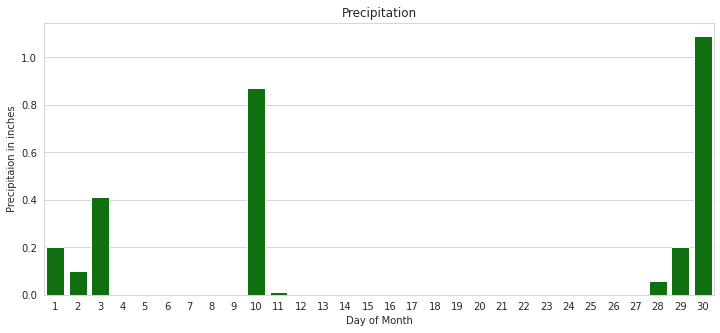

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
ax = sns.barplot (data=dfweather, y="precip",  x='day', color="green" ) 
ax.set(xlabel="Day of Month", ylabel = "Precipitaion in inches", title="Precipitation") ;

### Wind

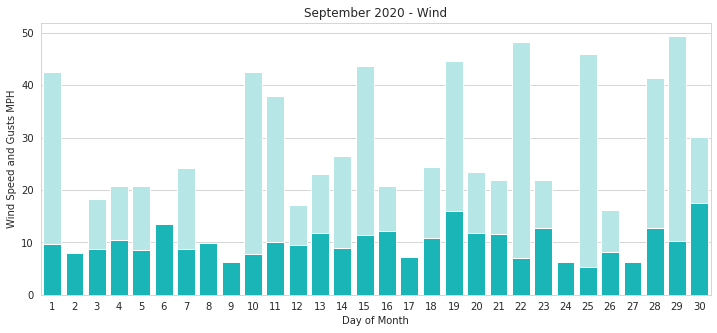

In [17]:
plt.figure(figsize=(12,5))
sns.barplot (data=dfweather, y="windgust", x='day', color="paleturquoise") ; 
overlay = sns.barplot(data=dfweather, x='day', y='windspeed' , color = "darkturquoise")
overlay.set(ylabel="Wind Speed and Gusts MPH", xlabel="Day of Month", title='September 2020 - Wind');

#### Show range of temperatures for each day
Top of bar is maximum temperature for the day<br>Bottom of bar is top of an invisible bar that shows mininum temperature for the day

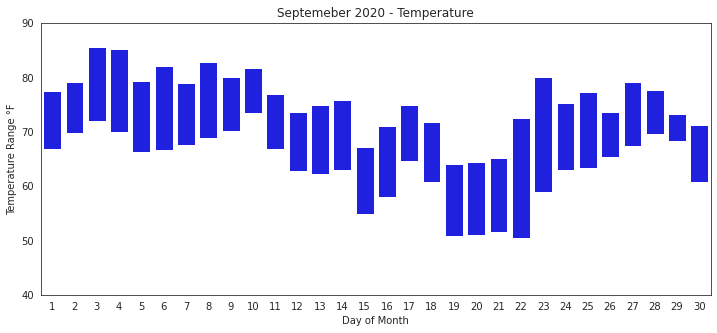

In [18]:
sns.set_style("white")
plt.figure(figsize=(12,5))

# Main plot - Maximum Temperature 
sns.barplot(data=dfweather, x='day',  y='tempmax' , color="blue" ) 
# overlay - Mininum Temperature - whiteout 
overlay = sns.barplot(data=dfweather, x='day', y='tempmin', color="white")

overlay.set(ylabel="Temperature Range °F",\
  xlabel="Day of Month", title='Septemeber 2020 - Temperature');
overlay.set_ylim(40,90) ; # show temperature range 40° to 90° 

## Automation
To look at additional month's data I don't want to go back and edit the code to get the data and generate the charts. So I created functions to automate the process. 

### Get Weather Data
This function takes as a paramaters the Year, Month and the API key read above. 

In [19]:
def get_weather(year,month,key):
    """
    Get weather data for year and month with API key
    Returns weather DataFrame 
    """
    start=("{}-{}-1".format(year,month))
    end=("{}-{}-31".format(year,month))
    url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/10001/'\
        + start + '/' + end + '?unitGroup=us&key=' + key + '&include=obs'
       
    response=requests.get(url)
    if response.status_code != 200:
        raise RuntimeError('Unable to retreive weather data')
        
    dfweather=pd.DataFrame(response.json()['days'])
    
#   convert datetime from string to actual datetime; extract day of month
    dfweather['datetime'] = pd.to_datetime(dfweather['datetime'], format='%Y-%m-%d')
    dfweather['day'] = dfweather['datetime'].dt.day
    
    return dfweather 

### Charts
These functions take as a paramater the weather DataFrame and generate the charts.

In [20]:
def chart_precip(dfweather):
    """
    Show precipitation chart for dataframe 
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,5))
    
    title=dfweather.datetime[0].month_name() + ' ' + str(dfweather.datetime[0].year) + ' - Precipitation'
    ax = sns.barplot (data=dfweather, y="precip",  x='day', color="green" ) 
    ax.set(xlabel="Day of Month", ylabel = "Precipitaion in inches", title = title ) ;


In [21]:
def chart_wind(dfweather):
    """
    Show temperature wind speed and wind gusts 
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,5))
    
    sns.barplot (data=dfweather, y="windgust", x='day', color="paleturquoise") ; 
    overlay = sns.barplot(data=dfweather, x='day', y='windspeed' , color = "darkturquoise")
    
    title=dfweather.datetime[0].month_name() + ' ' + str(dfweather.datetime[0].year) + ' - Wind Speed and Gusts'
    
    overlay.set(xlabel="Day of Month", ylabel ="Wind Speed and Gusts MPH", title = title ) ;

In [22]:
def chart_temp(dfweather):
    """
    Show temperature range chart for weather DataFrame
    """
    sns.set_style("white")
    plt.figure(figsize=(12,5))

    # Main plot - Maximum Temperature 
    sns.barplot(data=dfweather, x='day',  y='tempmax' , color="blue" ) 
    # overlay - Mininum Temperature - whiteout 
    overlay = sns.barplot(data=dfweather, x='day', y='tempmin' , color = "white")
    
    temprange=round(min(dfweather.tempmin)-1),round(max(dfweather.tempmax)+1)
    title=dfweather.datetime[0].month_name() + ' ' + str(dfweather.datetime[0].year) + ' - Temperature'
    
    overlay.set(xlabel="Day of Month", ylabel ="Temperature Range °F", title = title ) ;
    overlay.set_ylim(temprange) ;

In [23]:
def chart_snow(dfweather):
    """
    Show snow accumulation for weather dataframe 
    """
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,5))
    
    title=dfweather.datetime[0].month_name() + ' ' + str(dfweather.datetime[0].year) + ' - Snow Accumulation'
    ax = sns.barplot (data=dfweather, y="snow",  x='day', color="gray" ) 
    ax.set(xlabel="Day of Month", ylabel = "Accumulation in inches", title = title ) ;

### December 2020
Get data and run charts 

In [24]:
decweather=get_weather(2020,12,key)

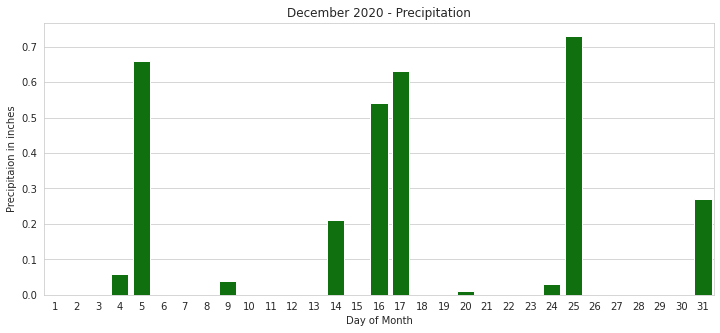

In [25]:
chart_precip(decweather)

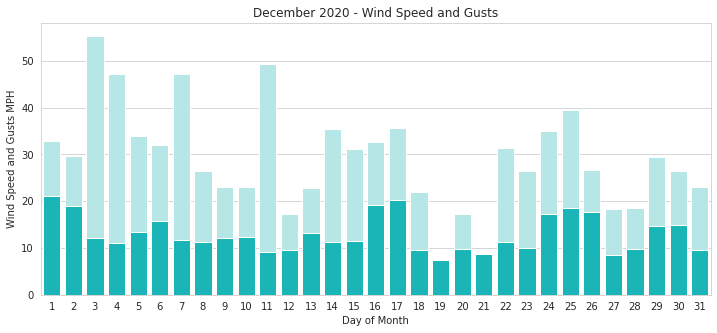

In [26]:
chart_wind(decweather)

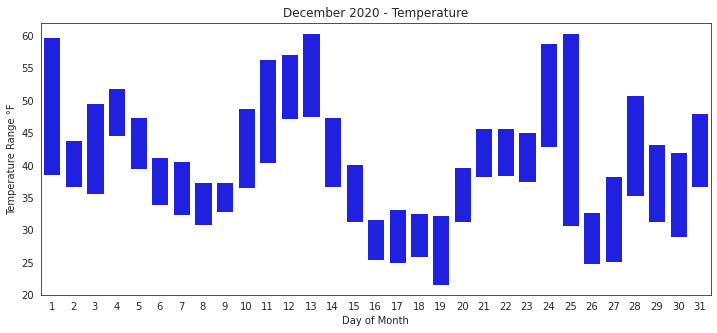

In [27]:
chart_temp(decweather)

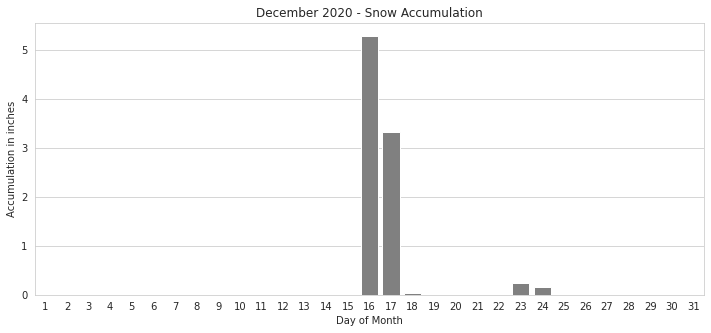

In [28]:
chart_snow(decweather)